In [1]:
import pandas as pd
import os

In [2]:
all_data = pd.read_csv("ammar_19.csv")

all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000


In [3]:
import numpy as np
import datetime

all_data['month'] = pd.DatetimeIndex(all_data['tgl_checkout']).month

all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000,1
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000,1
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750,1
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000,1
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000,1


In [4]:
results_month = all_data.groupby('month').sum()

top5 = results_month.drop(columns=['id_mitra', 'thn'])
top5.head()

,jml_pcs,total_harga,total_diskon,ongkir,total_bayar
month,,,,,
1,2208,193925000,0,9081000,140557000
2,2266,219790000,0,9022500,156903500
3,2636,270840000,37525250,2158723147,2332798647
4,9956,1025251000,356956300,45473494,712921694
5,12602,1714314001,617462850,89679234,1185423884


In [5]:
#Bar Chart Penjualan per bulan

import matplotlib.pyplot as plt
import calendar

months = range(1,13)

plt.bar(months, results_month['total_bayar'])
plt.xticks(months, calendar.month_name[1:13], rotation=45)
plt.yticks(results_month['total_bayar'], rotation=45)
plt.ylabel('Penjualan')
plt.xlabel('Month number')
plt.show()

<Figure size 640x480 with 1 Axes>

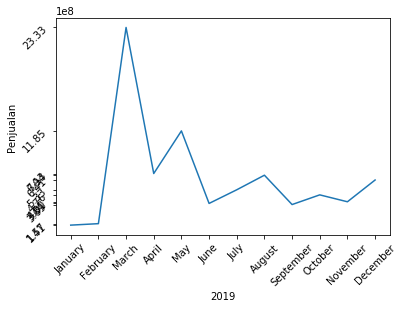

In [6]:
#Line Chart Penjualan per bulan

months = range(1,13)

plt.plot(results_month['total_bayar'])
plt.xticks(months, calendar.month_name[1:13], rotation=45)
plt.yticks(results_month['total_bayar'], rotation=45)
plt.ylabel('Penjualan')
plt.xlabel('2019')
plt.show()

In [7]:
results_kab = all_data.groupby('kabupaten').sum()

results_top5 = all_data.groupby('kabupaten').sum().nlargest(5,'total_bayar')


top5 = results_top5.drop(columns=['id_mitra', 'thn','month'])
top5

,jml_pcs,total_harga,total_diskon,ongkir,total_bayar
kabupaten,,,,,
Bandung,3149,821663000,273054450,19738000,521680300
Bekasi,1310,236880000,68170750,9855000,164677500
Jakarta Pusat,412,143305000,36905000,3212000,103375250
Depok,679,146120000,44716250,5723000,97321750
Bogor,759,131300000,37445250,6084000,92101500


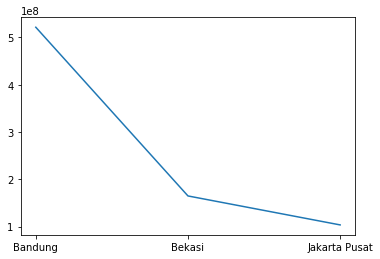

In [8]:
kab_agg = all_data.groupby('kabupaten').agg({'total_bayar':sum})
res = kab_agg.nlargest(3,'total_bayar')


plt.plot(res['total_bayar'])
#plt.xticks(kabupaten)
#plt.ylabel('Penjualan')
#plt.xlabel('Kabupaten')
#plt.show()

# 14 April 2020

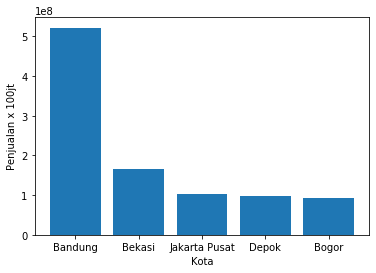

In [9]:
import matplotlib.pyplot as plt

#kabupaten = range(1,21)

kabs = [kabupaten for kabupaten, df in top5.groupby('kabupaten')]

plt.bar(kabs, top5['total_bayar'])
plt.xticks(kabs, ('Bandung','Bekasi','Jakarta Pusat','Depok','Bogor'))
plt.ylabel('Penjualan x 100jt')
plt.xlabel('Kota')
plt.show()

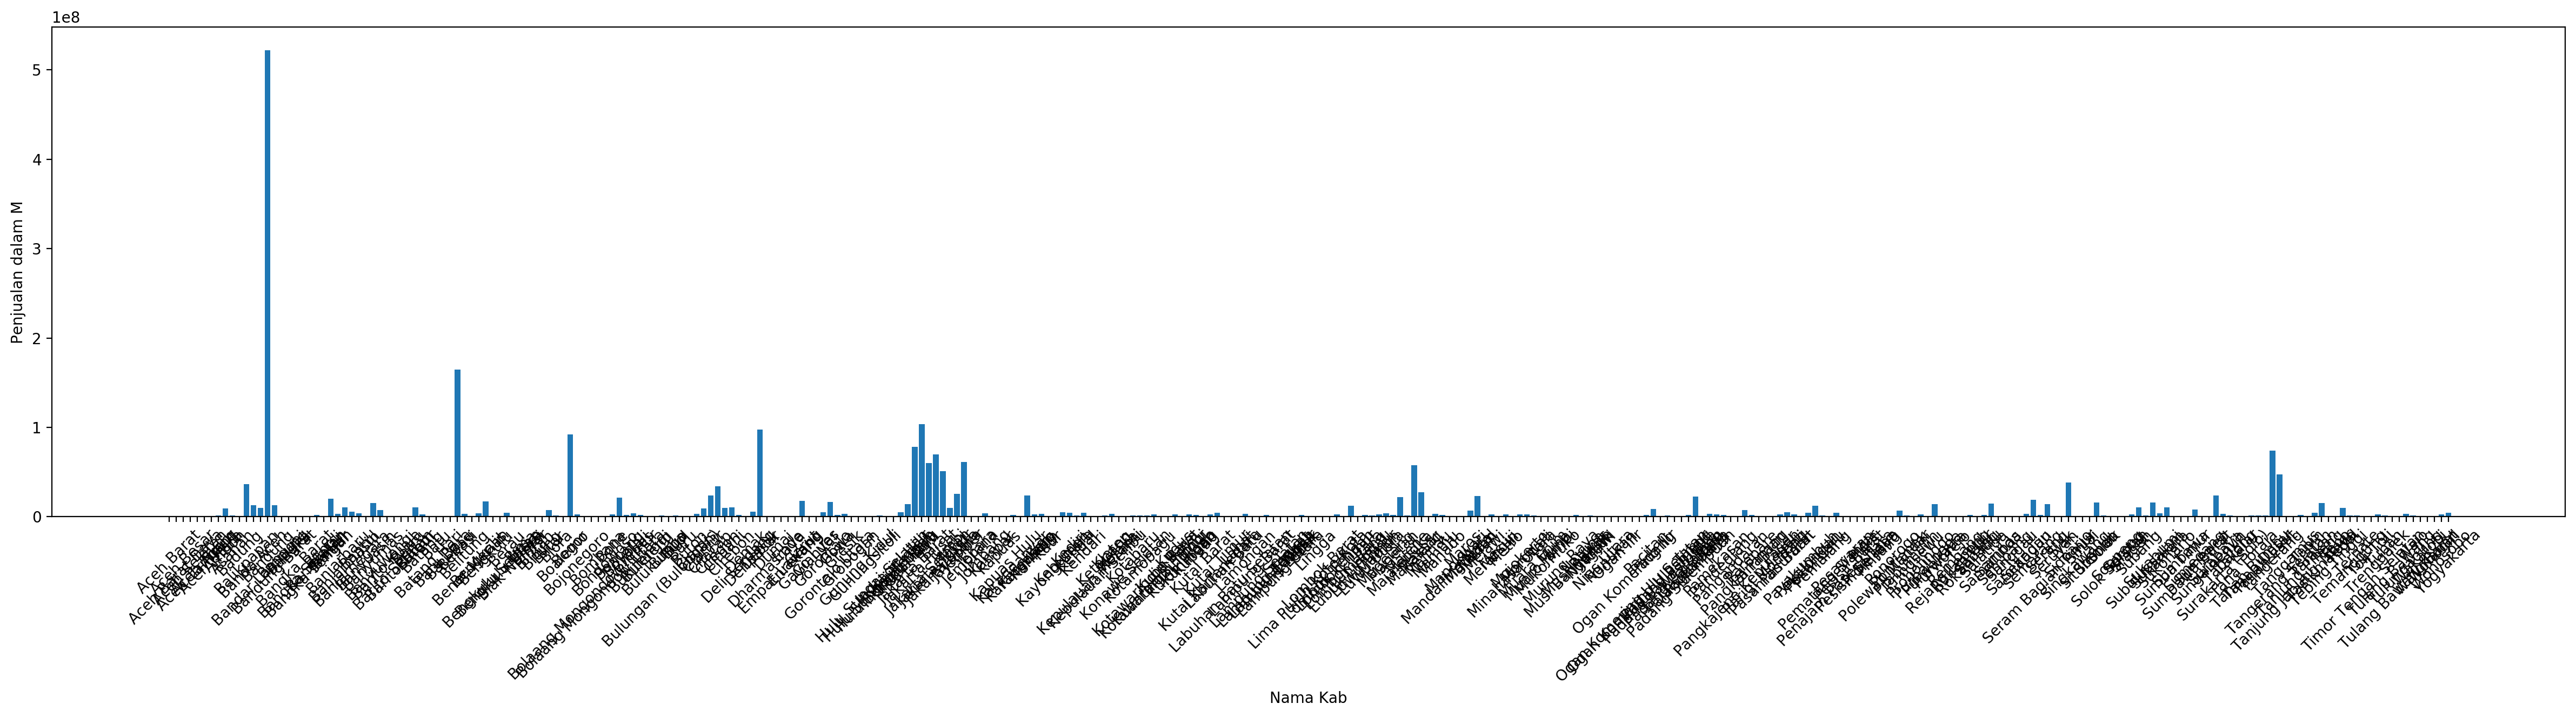

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=200, facecolor='w', edgecolor='k')

cities = [city for city, df in all_data.groupby('kabupaten')]

plt.bar(cities, results_kab['total_bayar'])
plt.xticks(cities, rotation = '45', size = 10)
plt.ylabel('Penjualan dalam M')
plt.xlabel('Nama Kab')
plt.show()



In [11]:
all_data['Hour'] = pd.to_datetime(all_data['jam']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['jam']).dt.minute
all_data['Count'] = 1
all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month,Hour,Minute,Count
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000,1,12,20,1
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000,1,21,10,1
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750,1,5,49,1
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000,1,7,28,1
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000,1,7,33,1


In [12]:
results_prop = all_data.groupby('propinsi').sum()
results_top5 = all_data.groupby('propinsi').sum().nlargest(5,'total_bayar')

top5 = results_top5.drop(columns=['id_mitra', 'thn', 'Hour', 'Minute', 'Count', 'month'])
top5.head() 

,jml_pcs,total_harga,total_diskon,ongkir,total_bayar
propinsi,,,,,
Jawa Barat,7414,1602078001,494178700,54619000,1067479800
DKI Jakarta,2338,518405000,150345250,17474000,362522500
Jawa Timur,1436,307410000,90871250,20827000,217015750
Banten,1455,252805000,84316250,11123500,173322250
Jawa Tengah,964,193865000,54380750,12173000,137079000


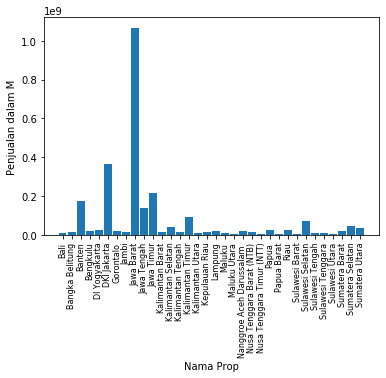

In [13]:
props = [prop for prop, df in all_data.groupby('propinsi')]

plt.bar(props, results_prop['total_bayar'])
plt.xticks(props, rotation = 'vertical', size = 8)
plt.ylabel('Penjualan dalam M')
plt.xlabel('Nama Prop')
plt.show()

In [14]:
all_data['Hour'] = pd.to_datetime(all_data['jam']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['jam']).dt.minute
all_data['Count'] = 1
all_data.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month,Hour,Minute,Count
0,1398,0101F7FD,Nita,Bekasi,Jawa Barat,2019/1/1,12:20,January,2019,1,95000,0,10000,86000,1,12,20,1
1,1393,0101LBDC,NAZNIA GALLERY,Jakarta Selatan,DKI Jakarta,2019/1/1,21:10,January,2019,3,240000,0,15000,171000,1,21,10,1
2,1393,0201D90C,NAZNIA GALLERY,Jakarta Timur,DKI Jakarta,2019/1/2,05:49,January,2019,1,55000,0,9000,44750,1,5,49,1
3,1773,0201K3GA,Azalia_Elhijab,Tulungagung,Jawa Timur,2019/1/2,07:28,January,2019,7,675000,0,28000,433000,1,7,28,1
4,1960,020167JK,Aisyiah,Tarakan,Kalimantan Utara,2019/1/2,07:33,January,2019,2,190000,0,34000,186000,1,7,33,1


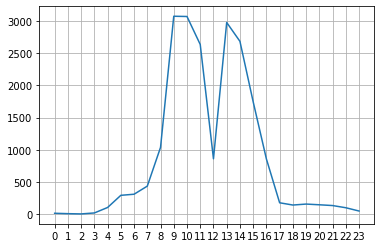

In [15]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# Penjualan tertinggi yaitu di jam 9-10 dan 13. Jika penayangan iklan dilakukan jam 8-9 dan jam 12 akan menghasilkan lebih banyak penjualan.


In [16]:
df = all_data[all_data['invoices'].duplicated(keep=False)]

df.head()

,id_mitra,invoices,nama_drop,kabupaten,propinsi,tgl_checkout,jam,bln,thn,jml_pcs,total_harga,total_diskon,ongkir,total_bayar,month,Hour,Minute,Count
17098,1,3010199FI0,rifca AD,NaN,NaN,2019/10/30,11:54,October,2019,13,1340000,402000,160000,1098000,10,11,54,1
17126,2618,3010199FI0,Renna,Jakarta Barat,DKI Jakarta,2019/10/30,20:14,October,2019,1,85000,29750,5000,60250,10,20,14,1


In [17]:
# Load spreadsheet dengan kategori, kode & produk

all_data2 = pd.read_csv("ammar_2019_detail.csv")
all_data2.head()

,id,id_produk,invoices,kategori,kode,nama_produk,ukuran,harga,harga_diskon,harga_profit,jumlah,subtotal,thn,tgl_checkout
0,11131,234,0101F7FD,muslim heroes,MH 03,SHALAHUDDIN AL-AYYUBI (l/xl) (,xl,95000,76000,0,1,95000,2019,1/1/2019
1,11132,258,0101LBDC,raglan,AR31,IBUMU (m/l) (m/l),l,80000,52000,0,1,80000,2019,1/1/2019
2,11133,49,0101LBDC,t-shirt,AT24,MUSLIM HABITS (m/l),l,80000,52000,0,1,80000,2019,1/1/2019
3,11134,243,0101LBDC,raglan,AR28,PRINCESS MUSLIMAH (m/l),l,80000,52000,0,1,80000,2019,1/1/2019
4,11135,201,0201D90C,t-shirt,AT64,Pray before flight (xs/s),s,55000,35750,0,1,55000,2019,2/1/2019


In [18]:
# Drop duplikat di 'Grouped'

df = all_data2[all_data2['invoices'].duplicated(keep=False)]
df['Grouped'] = df.groupby('invoices')['kode'].transform(lambda x: ','.join(x))
df2 = df[['invoices', 'Grouped']].drop_duplicates()
df2.head()

E:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,invoices,Grouped
1,0101LBDC,"AR31,AT24,AR28"
5,0201K3GA,"AT51,JGA05,JGA05,AR35,AT51,JGA05"
11,020167JK,"MH 05,MH 03"
16,0201722B,"JGA05,KH02"
18,0201F56D,"AT69,AT69"


In [19]:
# Kombinasi kode produk paling laris

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(50):
    print(key, value)

('AT51', 'AT51') 1841
('AT51', 'AT59') 1436
('AR17', 'AR17') 1259
('AT51', 'AT58') 1221
('KH01', 'KH02') 1159
('AT59', 'AT59') 1115
('AR24', 'AR24') 1106
('GA04', 'GA05') 1049
('AT34', 'AT34') 1043
('AR28', 'AR28') 1024
('KH01', 'KH03') 1019
('KH02', 'KH03') 1018
('AR24', 'AR25') 1015
('KH02', 'KH04') 1014
('KH01', 'KH04') 1011
('GA04', 'GA04') 934
('KH03', 'KH04') 925
('AR17', 'AT51') 921
('AT59', 'AT51') 905
('AT51', 'GA04') 889
('AR17', 'AR24') 880
('AR17', 'AR28') 832
('AR17', 'AT62') 825
('AT58', 'AT58') 823
('AR17', 'AT34') 816
('AT51', 'AT62') 814
('GA02', 'GA04') 805
('AT58', 'AT59') 797
('AT62', 'AT62') 788
('AR24', 'AT34') 784
('AR28', 'AT51') 784
('AT34', 'AT51') 768
('AT51', 'AT70') 764
('AR24', 'AT51') 764
('AR25', 'AR25') 738
('AT51', 'AR17') 733
('AT51', 'AT34') 725
('GA03', 'GA04') 724
('AT51', 'AR25') 717
('AR24', 'AT62') 712
('AR17', 'AT59') 706
('AT34', 'AR24') 705
('AR17', 'GA04') 703
('AT51', 'AR24') 699
('AR24', 'AT59') 695
('AT58', 'AT51') 685
('AR24', 'GA04') 68

In [20]:
# Kombinasi kategori paling laris

df3 = all_data2[all_data2['invoices'].duplicated(keep=False)]
df3['Grouped'] = df.groupby('invoices')['kategori'].transform(lambda x: ','.join(x))
df4 = df3[['invoices', 'Grouped']].drop_duplicates()

for row in df4['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(20):
    print(key, value)

('t-shirt', 't-shirt') 94458
('raglan', 't-shirt') 61883
('t-shirt', 'raglan') 47402
('raglan', 'raglan') 44348
('t-shirt', 'gamis') 23570
('gamis', 't-shirt') 18149
('t-shirt', 'khalifah') 16733
('khalifah', 't-shirt') 16563
('t-shirt', 'jogger pants') 14813
('raglan', 'gamis') 14665
('gamis', 'raglan') 11866
('khalifah', 'raglan') 11759
('gamis', 'gamis') 11696
('raglan', 'khalifah') 10467
('khalifah', 'khalifah') 9591
('raglan', 'jogger pants') 9516
('jogger pants', 't-shirt') 9201
('jogger pants', 'raglan') 6092
('khalifah', 'gamis') 5406
('gamis', 'khalifah') 5257


E:\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


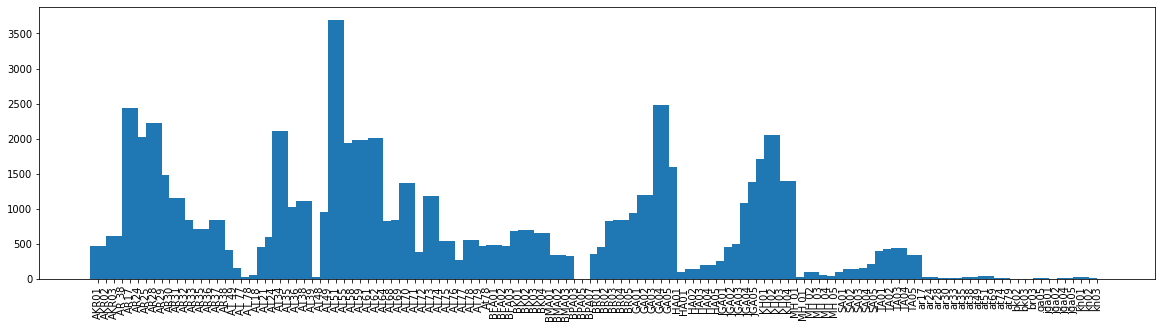

In [21]:
product_group = all_data2.groupby('kode')
quantity_ordered = product_group.sum()['jumlah']

fig= plt.figure(figsize=(20,5))
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered, width = 2)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()



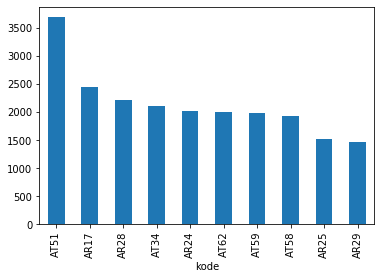

In [22]:
# Menentukan top 10 kode terlaris

produk_top10 = quantity_ordered.head(50).nlargest(10)
produk_top10.plot(kind='bar')
plt.show()

# print(produk_top10[:5])
# fig= plt.figure(figsize=(10,2))
# keys = [pair for pair, df in product_top10]
# plt.bar(keys, quantity_ordered, width = 0.8)
# plt.xticks(keys, rotation='vertical', size=10)
# plt.show()

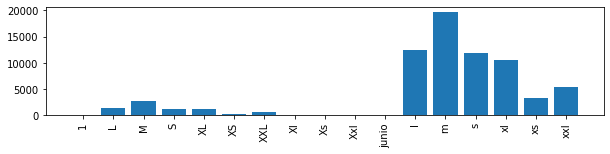

In [23]:
# Ukuran terlaris

product_group_size = all_data2.groupby('ukuran')
quantity_ordered_size = product_group_size.sum()['jumlah']

fig= plt.figure(figsize=(10,2))
keys = [pair for pair, df in product_group_size]
plt.bar(keys, quantity_ordered_size, width = 0.8)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

In [28]:
# stackoverflow

values = np.array([2,5,3,6,4,7,1])   
idx = np.array(list('abcdefg')) 
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]

# print(type(values))
# sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

<class 'numpy.ndarray'>


In [29]:
# print(type(quantity_ordered_size))
quantity_ordered_size_arr = np.array(quantity_ordered_size)

fig= plt.figure(figsize=(10,2))
keys = [pair for pair, df in product_group_size]
plt.bar(keys, quantity_ordered_size, width = 0.8)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
plt.bar(idx, values, color=clrs)

In [30]:
# plt.bar(idx, values, color=clrs)

array([    1,  1354,  2758,  1223,  1158,   335,   554,    48,     6,
          15,     3, 12531, 19757, 11973, 10585,  3288,  5403],
      dtype=int64)

In [31]:
quantity_ordered_size

ukuran
1            1
L         1354
M         2758
S         1223
XL        1158
XS         335
XXL        554
Xl          48
Xs           6
Xxl         15
junio        3
l        12531
m        19757
s        11973
xl       10585
xs        3288
xxl       5403
Name: jumlah, dtype: int64